In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('D:\\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Categoriacal to numeric

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputer for numerical columns
numerical_imputer = IterativeImputer(max_iter=10)

# Imputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Columns for numeric imputation
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 
                     'FastingBS', 'MaxHR', 'Oldpeak', 
                     'HeartDisease']

# Columns for categorical imputation
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 
                       'ExerciseAngina', 'ST_Slope']

for col in categorical_columns:
    df[[col]] = categorical_imputer.fit_transform(df[[col]]) 
    
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


[[68  9]
 [22 85]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81        77
         1.0       0.90      0.79      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



Text(50.722222222222214, 0.5, 'Actual')

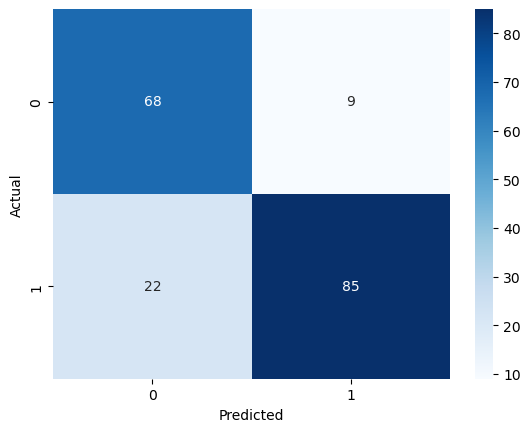

In [12]:
# Loop to impute each column
for col in numerical_columns:
    df[col] = numerical_imputer.fit_transform(df[[col]]) 
# split the data into X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=3)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit the model on the training data
model.fit(X_train_scaled, y_train)
# predict the species for the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')